In [1]:
import numpy as np
import matplotlib.pyplot as plt
from alibi_detect.od import SpectralResidual
from alibi_detect.utils.perturbation import inject_outlier_ts


%load_ext autoreload
%autoreload 2

## Original implementation

In [2]:
def generate_signal(a: float, k: int, N: int):
    x = np.linspace(0, N - 1, N)
    return a * np.cos(2 * np.pi / N * k * x)

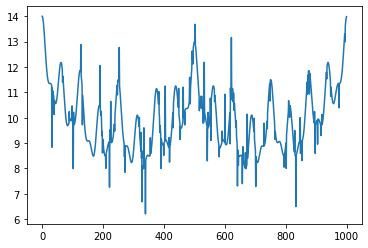

In [3]:
N = 1000
x = np.linspace(0, N-1, N)

y1 = generate_signal(a=0.5, k=1, N=N)
y2 = generate_signal(a=1, k=2, N=N)
y3 = generate_signal(a=0.5, k=4, N=N)
y4 = generate_signal(a=0.5, k=8, N=N)
y5 = generate_signal(a=1, k=16, N=N)
y6 = generate_signal(a=0.5, k=32, N=N)
y =  10 + y1 + y2 + y3 + y4 + y5 + y6
y = inject_outlier_ts(y, perc_outlier=10, perc_window=10, n_std=1., min_std=0.5)['data']


window_amp = 10
window_local = 20
conv_amp = np.ones((1, window_amp)).reshape(-1,) / window_amp
conv_local = np.ones((1, window_local)).reshape(-1,) / window_local
plt.plot(x, y)

In [4]:
od = SpectralResidual(
    threshold=None,  # threshold for outlier score
    window_amp=window_amp,   # window for the average log amplitude
    window_local=window_local, # window for the average saliency map
    n_est_points=5, # nb of estimated points padded to the end of the sequence
    padding_amp_method='reflect',
    padding_local_method='reflect'
)

No threshold level set. Need to infer threshold using `infer_threshold`.


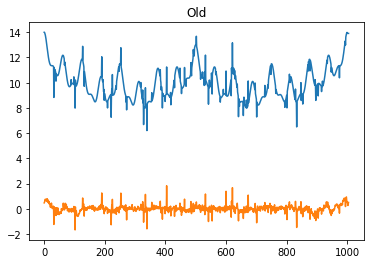

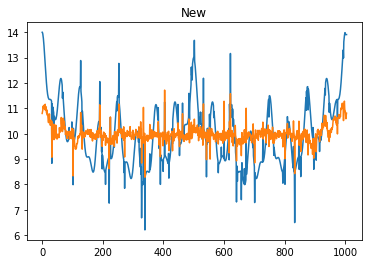

In [5]:
old_scores = od.score(y, use_old=True)
new_scores = od.score(y, use_old=False)

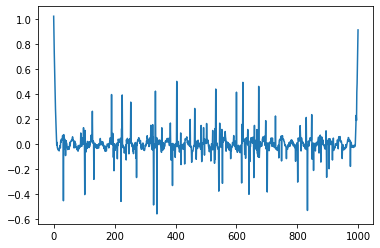

In [6]:
plt.plot(old_scores)
# plt.plot(new_scores)